In [59]:
from experiments.evaluation_flow.shared import MODELS
from experiments.plots.util import *

In [60]:
all_files_parsed = parse_all_log_files('/Users/nils/Downloads/log-dir')
baseline_only = filter_parsed_files(all_files_parsed, ('approach', 'param_update'))
baseline_versions = filter_parsed_files(baseline_only, ('snapshot_type', 'version'))
baseline_version_food = filter_parsed_files(baseline_versions, ('snapshot_dist', 'food'))

baseline_version_food_server = filter_parsed_files(baseline_version_food, ('location', 'server'))
baseline_version_food_server_0 = filter_parsed_files(baseline_version_food_server, ('run', '1'))

baseline_version_food_node = filter_parsed_files(baseline_version_food, ('location', 'node'))
baseline_version_food_node_0 = filter_parsed_files(baseline_version_food_node, ('run', '1'))

save_times = {}

for file in baseline_version_food_server_0:
    meta, events = file
    times = {}
    for e in events:
        if e.use_case == U_1:
            times[U_1] = e.duration_s
        elif e.use_case == U_2:
            times[U_2] = e.duration_s
    save_times[meta[MODEL]] = times

for file in baseline_version_food_node_0:
    meta, events = file
    times = {}
    u31_counter = 1
    u32_counter = 1
    for e in events:
        if e.use_case and e.use_case.startswith(U_3_1):
            key = "{}_{}".format(e.use_case, u31_counter)
            times[key] = e.duration_s
            u31_counter += 1
        elif e.use_case and e.use_case.startswith(U_3_2):
            key = "{}_{}".format(e.use_case, u32_counter)
            times[key] = e.duration_s
            u32_counter += 1
    save_times[meta[MODEL]].update(times)

file is broken: /Users/nils/Downloads/log-dir/server--model:googlenet--approach:param_update_improved--snapshot_type:version--snapshot_dist:food--run:0.txt


In [61]:
print(save_times)

{'resnet18': {'U_1': 11.920199923, 'U_2': 3.9293653070000003, 'U_3_1_1_1': 3.765353166, 'U_3_1_2_2': 2.225641844, 'U_3_1_3_3': 2.193260563, 'U_3_1_4_4': 2.28998215, 'U_3_2_1_1': 2.3111301980000003, 'U_3_2_2_2': 2.3692817400000004, 'U_3_2_3_3': 2.395940529, 'U_3_2_4_4': 2.3745055070000003}, 'resnet152': {'U_1': 12.750179026000001, 'U_2': 6.6730865790000005, 'U_3_1_1_1': 6.316514398000001, 'U_3_1_2_2': 4.614683308, 'U_3_1_3_3': 4.738506303, 'U_3_1_4_4': 4.955379655000001, 'U_3_2_1_1': 4.68175462, 'U_3_2_2_2': 4.947949840000001, 'U_3_2_3_3': 4.990921109, 'U_3_2_4_4': 5.7288404790000005}, 'googlenet': {'U_1': 11.899689742000001, 'U_2': 3.91112676, 'U_3_1_1_1': 3.9311769020000003, 'U_3_1_2_2': 2.326271595, 'U_3_1_3_3': 2.437713077, 'U_3_1_4_4': 2.4026218740000003, 'U_3_2_1_1': 2.3711567010000003, 'U_3_2_2_2': 2.45912597, 'U_3_2_3_3': 2.4712748270000002, 'U_3_2_4_4': 2.472481929}, 'mobilenet': {'U_1': 11.759241305000002, 'U_2': 3.4305238960000004, 'U_3_1_1_1': 3.403657774, 'U_3_1_2_2': 1.874

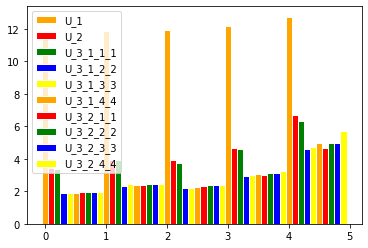

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bars
barWidth = 0.1

bars = {}
for m in MODELS:
    times = save_times[m]
    for use_case, time in times.items():
        if use_case in bars:
            bars[use_case].append(time)
        else:
            bars[use_case] = [time]

# Set position of bar on X axis
# l = len(bars[U_1])
# print(l)
# positions = [np.arange(l)]
# for i in range(1, len(bars)):
#     prev_positions = positions[-1]
#     positions.append(prev_positions)

r1 = np.arange(5)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]
r9 = [x + barWidth for x in r8]
r10 = [x + barWidth for x in r9]
positions = [r1, r2, r3, r4, r5, r6, r7, r8, r9, r10]

colors = ['orange', 'red', 'green', 'blue', 'yellow', 'orange', 'red', 'green', 'blue', 'yellow']

for position, bar, color, label in zip(positions, list(bars.values())[:], colors, list(bars.keys())[:]):
    plt.bar(position, bar, color=color, width=barWidth, edgecolor='white', label=label)

# # Add xticks on the middle of the group bars
# plt.xlabel('group', fontweight='bold')
# plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C', 'D', 'E'])

# Create legend & Show graphic
plt.legend()
plt.show()

In [63]:
meta, events = baseline_version_food_server_0[0]
e_u1 = events[0]
e_u2 = events[5]
print(e_u1)
print(e_u2)



U_1: 11.9201999230s 
save_model -- all: 10.2947774070s 
	_save_full_model -- all: 10.2811216170s 
		_save_full_model -- pickle_weights: 0.0860045190s 
		_save_full_model -- _get_weights_hash_info: 0.0652820190s 
		_save_full_model -- persist_model_info: 10.1284222410s 
			persist -- schema_obj(model_info): 10.1283166830s 
				persist -- schema_obj(recover_info): 10.1234719220s 
					mmlib_file_pers -- save_file: 0.0259087680s 
					mmlib_file_pers -- save_file: 0.0749395560s 
					persist -- schema_obj(environment): 10.0200059630s 
						mmlib_dict_pers -- save_dict -- collection(environment): 10.0196867900s 
					mmlib_dict_pers -- save_dict -- collection(recover_info): 0.0022744730s 
				mmlib_dict_pers -- save_dict -- collection(model_info): 0.0041386300s 

U_2: 3.9293653070s 
save_model -- all: 2.2994507500s 
	_save_updated_model -- all: 2.2943831870s 
		_save_updated_model -- get_weights_hash_info: 0.0824844730s 
		_save_updated_model -- generate_weights_update: 2.1397162930s 
			

In [64]:
meta, events = extract_event_and_and_meta('/Users/nils/Downloads/test-env-log.txt')

In [65]:
for e in events:
    print(e)

_save_full_model -- all: 0.3082060000s 
_save_full_model -- pickle_weights: 0.0953320000s 
_save_full_model -- _get_weights_hash_info: 0.0698870000s 
_save_full_model -- persist_model_info: 0.1413980000s 
	persist -- schema_obj(model_info): 0.1410610000s 
		persist -- schema_obj(recover_info): 0.1235970000s 
			mmlib_file_pers -- save_file: 0.0016580000s 
			mmlib_file_pers -- save_file: 0.0814890000s 
			persist -- schema_obj(environment): 0.0247970000s 
				mmlib_dict_pers -- save_dict -- collection(environment): 0.0242560000s 
			mmlib_dict_pers -- save_dict -- collection(recover_info): 0.0142790000s 
		mmlib_dict_pers -- save_dict -- collection(model_info): 0.0166370000s 

recover_model-60c71b6cafd8052e3423f911 -- all: 0.9969300000s 
recover_model -- load_model_info_rec_files: 0.0877010000s 
	mmlib_dict_pers -- recover_dict -- collection(model_info): 0.0001530000s 
	mmlib_dict_pers -- recover_dict -- collection(recover_info): 0.0002010000s 
	mmlib_file_pers -- recover_file: 0.00069